In [6]:
import pandas as pd
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import math
import cv2
import glob
import os

%matplotlib inline

## Visualization method

In [7]:
def visualize_trajectory(df_values):
    
    # Convert dataframe into numpy array
    list_of_pos = df_values.values.tolist()
    trajectory = np.array(list_of_pos).T

    #list for x, y and z values
    locX = list(trajectory[0,:])
    locY = list(trajectory[1,:])
    locZ = list(trajectory[2,:])
    
    # Axis limits
    maxX = np.amax(locX) + 1
    minX = np.amin(locX) - 1
    maxY = np.amax(locY) + 1
    minY = np.amin(locY) - 1 
    maxZ = np.amax(locZ) + 1
    minZ = np.amin(locZ) - 1

    # Set styles
    mpl.rc("figure", facecolor="white")
    plt.style.use("seaborn-whitegrid")

    # Plot the figure
    fig = plt.figure(figsize=(8, 6), dpi=100)
    gspec = gridspec.GridSpec(2, 2)
    ZY_plt = plt.subplot(gspec[1,1])
    YX_plt = plt.subplot(gspec[0,1])
    ZX_plt = plt.subplot(gspec[1,0])
    D3_plt = plt.subplot(gspec[0,0], projection='3d')
    
    toffset = 1.0
    
    # Actual trajectory plotting ZX
    
    ZX_plt.set_title("Trajectory (X, Z)", y=toffset)
    ZX_plt.plot(locX, locZ, "--", label="Trajectory", zorder=1, linewidth=1.5, markersize=2)
    ZX_plt.set_xlabel("X")
    ZX_plt.set_ylabel("Z")
    # Plot camera initial location
    ZX_plt.scatter([0], [0], s=8, c="green", label="Start location", zorder=2)
    ZX_plt.scatter(locX[-1], locZ[-1], s=8, c="red", label="End location", zorder=2)
    ZX_plt.set_xlim([minX, maxX])
    ZX_plt.set_ylim([minZ, maxZ])
    ZX_plt.legend(bbox_to_anchor=(1.05, 1.0), loc=3, title="Legend", borderaxespad=0., fontsize="medium", frameon=True)
        
    # Plot ZY
    ZY_plt.set_title("Trajectory (Y, Z)", y=toffset)
    ZY_plt.set_xlabel("Y")
    ZY_plt.plot(locY, locZ, "--", linewidth=1.5, markersize=2, zorder=1)
    ZY_plt.scatter([0], [0], s=8, c="green", label="Start location", zorder=2)
    ZY_plt.scatter(locY[-1], locZ[-1], s=8, c="red", label="End location", zorder=2)
    ZY_plt.set_xlim([minY, maxY])
    ZY_plt.set_ylim([minZ, maxZ])
    
    # Plot YX
    YX_plt.set_title("Trajectory (Y X)", y=toffset)
    YX_plt.set_ylabel("X")
    YX_plt.set_xlabel("Y")
    YX_plt.plot(locY, locX, "--", linewidth=1.5, markersize=2, zorder=1)
    YX_plt.scatter([0], [0], s=8, c="green", label="Start location", zorder=2)
    YX_plt.scatter(locY[-1], locX[-1], s=8, c="red", label="End location", zorder=2)
    YX_plt.set_xlim([minY, maxY])
    YX_plt.set_ylim([minX, maxX])

    # Plot 3D
    D3_plt.set_title("3D trajectory", y = 1.1)
    D3_plt.plot3D(xs = locX, ys = locY, zs = locZ, zorder=0)
    D3_plt.scatter(0, 0, 0, s=8, c="green", zorder=1)
    D3_plt.scatter(locX[-1], locY[-1], locZ[-1], s=8, c="red", zorder=1)
    D3_plt.set_xlim3d(minX, maxX)
    D3_plt.set_ylim3d(minY, maxY)
    D3_plt.set_zlim3d(minZ, maxZ)
    D3_plt.tick_params(direction='out', pad=-2)
    D3_plt.set_xlabel("X", labelpad=0)
    D3_plt.set_ylabel("Y", labelpad=0)
    D3_plt.set_zlabel("Z", labelpad=-5)
    
    # Plotting the result
    fig.suptitle("Vehicle's trajectory", fontsize=16, y = 1.05)
    D3_plt.view_init(35, azim=45)
    plt.tight_layout()
    plt.show()

## Loading the dataframe

In [8]:
df = pd.read_csv('data/ground_truth/gt_1.csv')

In [9]:
df.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,2767042000000,0,2767038000000,map,base_link,-2.667829e-10,-0.000002,3.463433e-07,0.000005,-7.756899e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2767074000000,1,2767074000000,map,base_link,-2.622925e-10,-0.000002,3.481283e-07,0.000005,-7.604584e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2767110000000,2,2767110000000,map,base_link,-2.594918e-10,-0.000002,3.498753e-07,0.000005,-7.509184e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2767146000000,3,2767146000000,map,base_link,-2.587419e-10,-0.000002,3.516112e-07,0.000005,-7.482835e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2767182000000,4,2767182000000,map,base_link,-2.598274e-10,-0.000002,3.533459e-07,0.000005,-7.518286e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = df.drop(columns=['%time', 'field.header.seq'])
df.head()

,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,field.pose.pose.orientation.z,field.pose.pose.orientation.w,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,2767038000000,map,base_link,-2.667829e-10,-0.000002,3.463433e-07,0.000005,-7.756899e-10,-8.347211e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2767074000000,map,base_link,-2.622925e-10,-0.000002,3.481283e-07,0.000005,-7.604584e-10,-8.351686e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2767110000000,map,base_link,-2.594918e-10,-0.000002,3.498753e-07,0.000005,-7.509184e-10,-8.356080e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2767146000000,map,base_link,-2.587419e-10,-0.000002,3.516112e-07,0.000005,-7.482835e-10,-8.360472e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2767182000000,map,base_link,-2.598274e-10,-0.000002,3.533459e-07,0.000005,-7.518286e-10,-8.364861e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pos_features = ['field.pose.pose.position.x', 'field.pose.pose.position.y', 'field.pose.pose.position.z']
orientation_features = ['field.pose.pose.orientation.x', 'field.pose.pose.orientation.y', 
                       'field.pose.pose.orientation.z', 'field.pose.pose.orientation.w']

In [12]:
position = df[pos_features]
position.head()

,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z
0,-2.667829e-10,-0.000002,3.463433e-07
1,-2.622925e-10,-0.000002,3.481283e-07
2,-2.594918e-10,-0.000002,3.498753e-07
3,-2.587419e-10,-0.000002,3.516112e-07
4,-2.598274e-10,-0.000002,3.533459e-07


In [13]:
list_of_pos = position.values.tolist()
list_of_pos = np.array(list_of_pos).T

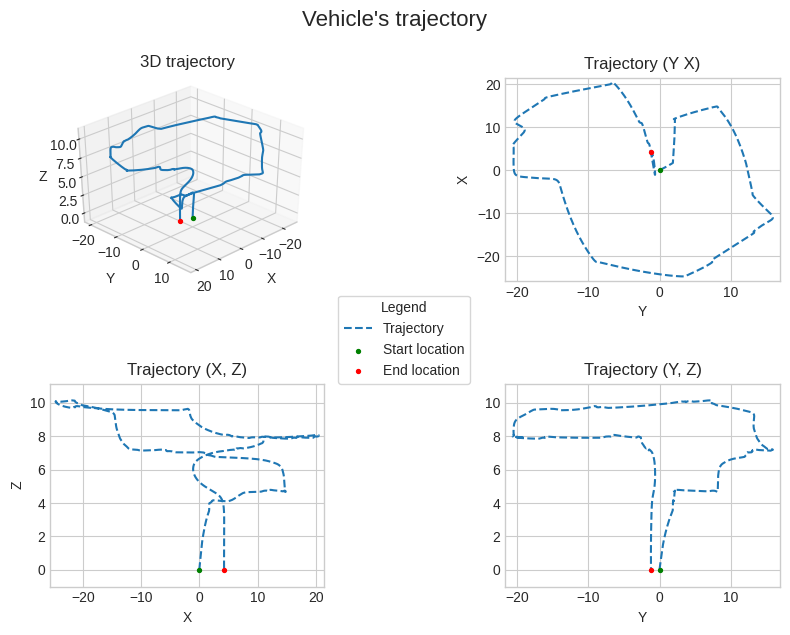

In [14]:
visualize_trajectory(position)

Read Chapter 6, Sections 1 to 3. Section 6.4 is about essential matrix
http://asrl.utias.utoronto.ca/~tdb/bib/barfoot_ser17.pdf
Read Section 5 of a technical report by
https://arxiv.org/pdf/1711.02508.pdf

In [15]:
from rotations import Quaternion, skew_symmetric

## 3D Geometry

To understand reference frames, this little sections aims to make clear the basic concepts. The next figure will be used to give a basic notation and properties of rotation matrices.

<img src='assets/rotationsT.png' width=320 />

### Vectors and reference frames

The notation of a coordinate frame is given by $\underrightarrow{\boldsymbol{\mathcal{F}}}_i$ where $i$ is the current coordinate frame. Similarly, $\underrightarrow{\boldsymbol{r}}^{vi}$ is a three position vector that points from coordinate frame $i$ to $v$. The equation gives shows the three points in a position vector.

\begin{equation}
    r_i = \begin{bmatrix} r_1 \\ r_2 \\ r_3 \end{bmatrix}
\end{equation}

It is possible to do operations with position vectors. The dot product between two vector $\underrightarrow{r}$ and $\underrightarrow{s}$

\begin{equation}
    \underrightarrow{\boldsymbol{r}} \cdot \underrightarrow{\boldsymbol{s}} = \underrightarrow{\boldsymbol{r}}^T \cdot \underrightarrow{\boldsymbol{s}} = r_1s_1 + r_2s_2 + r_3s_2
\end{equation}

The cross product between two vector $\underrightarrow{r}$ and $\underrightarrow{s}$

\begin{equation}
    \underrightarrow{\boldsymbol{r}} \times \underrightarrow{\boldsymbol{s}} = \boldsymbol{r}_i^{\times}\boldsymbol{s}_i
\end{equation}

Where $\boldsymbol{r}_i^{\times}$ is the skew symetric. The skew symetris has a set of properties such as $(\boldsymbol{r}_i^{\times})^T = -\boldsymbol{r}_1^{\times}$

\begin{equation}
    \boldsymbol{r}_1^{\times} = \begin{pmatrix} 0 & -r_3 & r_2 \\ r_3 & 0 & -r_1 \\  -r_2 & r_1 & 0 \end{pmatrix}
\end{equation}

### Rotations

Rotations matrices are used to describe the relative orientation of one reference frame with respect to other. These matrices are denoted as $\boldsymbol{c}_{iv} \in \mathbb{R}^{3 \times 3}$ and it means that this rotation matrix comes from frame $i$ to frame $v$.

\begin{equation}
    \boldsymbol{c}_{iv} = \begin{pmatrix} c_{11} & c_{12} & c_{13} \\ c_{21} & c_{22} & c_{23} \\  c_{31} & c_{32} & c_{33} \end{pmatrix}
\end{equation}

Rotation matrices are orthogonal matrices, which means that their inverse is equal to its transpose $\boldsymbol{c}_{vi} = \boldsymbol{c}_{iv}^{-1} = \boldsymbol{c}_{iv}^{T}$. Using rotation matrices is possible to map points between different reference frames. Supposing that frame $i$ and $v$ are in the same position but with different orientation, point $p$ could be mapped as follows.

\begin{equation}
    r_i^{pi} = \boldsymbol{c}_{vi}^{-1} r_v^{pv} = \boldsymbol{c}_{iv} r_v^{pv}
\end{equation}

It is possible to perform operations between rotation matrices as follows.

\begin{equation}
    r_3 = \boldsymbol{c}_{32} r_2 = \boldsymbol{c}_{32} \boldsymbol{c}_{21} r_1
\end{equation}

\begin{equation}
    r_3 = \boldsymbol{c}_{31} r_1
\end{equation}

\begin{equation}
    \boldsymbol{c}_{31} = \boldsymbol{c}_{32} \boldsymbol{c}_{21}
\end{equation}

To map a point between reference frames in different positions use the next relation.

\begin{equation}
    \boldsymbol{r}_i^{pi} = \boldsymbol{r}_{i}^{vi} + \boldsymbol{c}_{iv} \boldsymbol{r}_{v}^{pv} 
\end{equation}

### Principal rotations

Rotation on each axis roll x $\theta$, pitch y $\beta$ and yaw z $\gamma$ are the principal rotations and are shown below.

\begin{equation}
    \boldsymbol{c}(\gamma) = \begin{pmatrix} cos(\gamma) & sin(\gamma) & 0 \\ -sin(\gamma) & cos(\gamma) & 0 \\  0 & 0 & 1 \end{pmatrix}, \boldsymbol{c}(\beta) = \begin{pmatrix} cos(\beta) & 0 & -sin(\beta) \\ 0 & 1 & 0 \\  sin(\beta) & 0 & cos(\beta) \end{pmatrix}, \boldsymbol{c}(\theta) = \begin{pmatrix} 1 & 0 & 0 \\ 0 & cos(\theta) & sin(\theta) \\  0 & -sin(\theta) & cos(\theta) \end{pmatrix}
\end{equation}

These rotations can be multiplied in the next form and create another form to represent rotations called Euler angles.

\begin{equation}
    \boldsymbol{c}(\gamma, \beta, \theta) =  \boldsymbol{c}_3(\gamma) \boldsymbol{c}_2(\beta) \boldsymbol{c}_1(\theta)
\end{equation}

### Quaternions

Quaternions are a different form to represent orientations. The parameters $\epsilon \in \mathbb{R}^{3 \times 1}$ and $\eta \in \mathbb{1}$ conform them. Below is the equation of a Quaternion where $\eta = cos(\phi/2)$ and $\epsilon = \hat{u} sin(\phi/2)$.

\begin{equation}
    \boldsymbol{q} = \begin{bmatrix} \epsilon \\ \eta \end{bmatrix} \in \mathbb{R}^{4 \times 1}
\end{equation}

Some of their properties is: $||q|| = 1$, $\boldsymbol{q}^T \boldsymbol{q} = 1$ and its inverse is given by

\begin{equation}
    \boldsymbol{q}^{-1} = \begin{bmatrix} -\epsilon \\ \eta \end{bmatrix} \in \mathbb{R}^{4 \times 1}
\end{equation}

It is possible to transform a Quaternion into a rotation matrix with the next equations.

\begin{equation}
    \boldsymbol{r}_b = \boldsymbol{C}(\boldsymbol{q}_{ba})\boldsymbol{r}_a
\end{equation}

\begin{equation}
    \boldsymbol{C}(q) = (\eta^2 - \boldsymbol{\epsilon}^T\boldsymbol{\epsilon})\mathbb{I} + 2\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T + 2\eta[\boldsymbol{\epsilon}]_{\times}
\end{equation}

Similarly, the product between two quaternions is given as follows.

\begin{equation}
    \boldsymbol{p} \otimes \boldsymbol{q}  = \begin{bmatrix} \boldsymbol{p}_\eta \boldsymbol{q}_\eta - \boldsymbol{p}_\epsilon^T \boldsymbol{q}_\epsilon \\ \boldsymbol{p}_\eta\boldsymbol{q}_\epsilon + \boldsymbol{q}_\eta \boldsymbol{p}_\epsilon + [\boldsymbol{p}_\epsilon]_{\times} \boldsymbol{q}_\epsilon \end{bmatrix}
\end{equation}

### Transformation matrices

These is a compact form to represent rotations + traslations between reference frames. One property of Transformation matrices is $\boldsymbol{T}_{iv} = \boldsymbol{T}_{ia} \boldsymbol{T}_{ab} \boldsymbol{T}_{bv}$, which is exactly the same of rotation matrices.

To map a point between different coordinate frames, the relation is given as follows.

\begin{equation}
    \begin{bmatrix} r_i^{pi} \\ 1 \end{bmatrix} = \begin{pmatrix} \boldsymbol{c}_{iv} & \boldsymbol{r}_i^{vi} \\ \boldsymbol{0} & 1 \end{pmatrix} \begin{bmatrix} r_v^{pv} \\ 1 \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
\end{equation}

Some of their properties are given below.

\begin{equation}
    \begin{bmatrix} r_v^{pv} \\ 1 \end{bmatrix} = \boldsymbol{T}_{iv}^{-1} \begin{bmatrix} r_i^{pi} \\ 1 \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
\end{equation}

\begin{equation}
    \boldsymbol{T}_{iv}^{-1} = \begin{pmatrix} \boldsymbol{c}_{iv} & \boldsymbol{r}_i^{vi} \\ \boldsymbol{0} & 1 \end{pmatrix}^{-1} = \begin{pmatrix} \boldsymbol{c}_{iv}^T & -\boldsymbol{c}_{iv}^T \boldsymbol{r}_i^{vi} \\ \boldsymbol{0} & 1 \end{pmatrix} = \begin{pmatrix} \boldsymbol{c}_{vi} & -\boldsymbol{r}_v^{vi} \\ \boldsymbol{0} & 1 \end{pmatrix} = \begin{pmatrix} \boldsymbol{c}_{vi} & \boldsymbol{r}_v^{iv} \\ \boldsymbol{0} & 1 \end{pmatrix} = \boldsymbol{T}_{vi}
\end{equation}

For further information about 3D Geometry and transformations between quaternions and other rotations' representations, see Chapter 6, Sections 1 to 3 [State estimation for Robotics](http://asrl.utias.utoronto.ca/~tdb/bib/barfoot_ser17.pdf)

In [16]:
orientation = df[orientation_features]
orientation.head()

,field.pose.pose.orientation.x,field.pose.pose.orientation.y,field.pose.pose.orientation.z,field.pose.pose.orientation.w
0,0.000005,-7.756899e-10,-8.347211e-12,1.0
1,0.000005,-7.604584e-10,-8.351686e-12,1.0
2,0.000005,-7.509184e-10,-8.356080e-12,1.0
3,0.000005,-7.482835e-10,-8.360472e-12,1.0
4,0.000005,-7.518286e-10,-8.364861e-12,1.0


In [17]:
# Creating one quaternion
list_of_q = orientation.values.tolist()
list_of_q = np.array(list_of_q).T
q_1 = list_of_q[:,0]
q = Quaternion(w=q_1[3], x=q_1[0], y=q_1[1], z=q_1[2])
q

Quaternion (wxyz): [1.00000, 0.00001, -0.00000, -0.00000]

In [18]:
# Print rotation matrix
q.to_mat()

array([[0.9999999999994867, array([1.66859968e-11]),
        array([-1.55137997e-09])],
       [array([-1.67028453e-11]), 0.9999999999405133,
        array([-1.08603432e-05])],
       [array([1.55137978e-09]), array([1.08603432e-05]),
        0.9999999999405133]], dtype=object)

In [19]:
# Print euler angles, roll pitch and yaw
q.to_euler()

array([ 1.08603432e-05, -1.55137978e-09, -1.67028453e-11])

In [20]:
q = Quaternion(euler=q.to_euler())
q

Quaternion (wxyz): [1.00000, 0.00001, -0.00000, -0.00000]

In [21]:
def visualize_angles(rotations_df):
    
    list_of_rotations = rotations_df.values.tolist()
    rotations = np.array(list_of_rotations).T

    #list to unpack roll, pitch, yaw angles
    roll = []
    pitch = []
    yaw = []
    x_axis = np.arange(rotations.shape[1])
    
    for i in range(0, rotations.shape[1]):
        current_rot = rotations[:, i]
        q = Quaternion(w = current_rot[3], x = current_rot[0], 
                       y = current_rot[1], z = current_rot[2]).to_euler()
        
        roll.append(q.item(0))
        pitch.append(q.item(1))
        yaw.append(q.item(2))
        
    # Axis limits for Roll, Pitch and Yaw
    maxR = np.amax(roll) + 0.1
    minR = np.amin(roll) - 0.1
    maxP = np.amax(pitch) + 0.1
    minP = np.amin(pitch) - 0.1
    maxY = np.amax(yaw) + 0.1
    minY = np.amin(yaw) - 0.1
    maxX = rotations.shape[1] + 10
    minX = -5

    # Set styles
    mpl.rc("figure", facecolor="white")
    plt.style.use("seaborn-whitegrid")

    # Plot the figure
    fig = plt.figure(figsize=(8, 6), dpi=100)
    gspec = gridspec.GridSpec(3, 1)
    R_plt = plt.subplot(gspec[0,0])
    P_plt = plt.subplot(gspec[1,0])
    Y_plt = plt.subplot(gspec[2,0])
    
    toffset = 1.0
    
    # Roll Trajectory
    
    R_plt.set_title(r'Roll angle $\theta$', y=toffset)
    R_plt.plot(x_axis, roll, "-", label="Angle", zorder=1, linewidth=1.5, markersize=2)
    R_plt.axes.xaxis.set_ticklabels([])
    R_plt.set_ylabel("Roll [rads]")
    # Plot camera initial location
    R_plt.scatter([0], [0], s=8, c="green", label="Start location", zorder=2)
    R_plt.scatter(x_axis[-1], roll[-1], s=8, c="red", label="End location", zorder=2)
    R_plt.set_xlim([minX, maxX])
    R_plt.set_ylim([minR, maxR])
        
    # Pitch Trajectory
    P_plt.set_title(r'Pitch angle $\beta$', y=toffset)
    P_plt.set_ylabel("Roll [rads]")
    P_plt.axes.xaxis.set_ticklabels([])
    P_plt.plot(x_axis, pitch, "-", linewidth=1.5, label="Trajectory", markersize=2, zorder=1)
    P_plt.scatter([0], [0], s=8, c="green", label="Start location", zorder=2)
    P_plt.scatter(x_axis[-1], pitch[-1], s=8, c="red", label="End location", zorder=2)
    P_plt.set_xlim([minX, maxX])
    P_plt.set_ylim([minP, maxP])
    
    # Yaw Trajectory
    Y_plt.set_title(r'Yaw angle $\gamma$', y=toffset)
    Y_plt.set_ylabel("Yaw")
    Y_plt.axes.xaxis.set_ticklabels([])
    Y_plt.plot(x_axis, yaw, "-", linewidth=1.5, label="Trajectory", markersize=2, zorder=1)
    Y_plt.scatter([0], [0], s=8, c="green", label="Start location", zorder=2)
    Y_plt.scatter(x_axis[-1], yaw[-1], s=8, c="red", label="End location", zorder=2)
    Y_plt.set_xlim([minX, maxX])
    Y_plt.set_ylim([minY, maxY])
    Y_plt.legend(loc=4, title="Legend", borderaxespad=0., fontsize="medium", frameon=True)
    
    # Plotting the result
    fig.suptitle("Vehicle's euler angles", fontsize=16, y = 1.05)
    plt.tight_layout()
    plt.show()

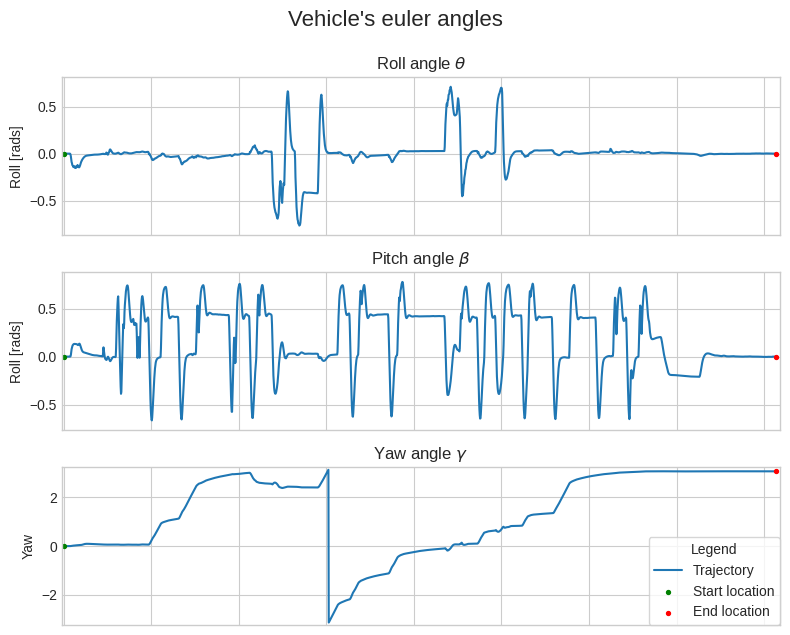

In [22]:
visualize_angles(orientation)

Extract time stamp of each image 

In [23]:
time_list = []
images_list = []
for filename in glob.glob('images/test_1/*.jpeg'): #assuming gif
    img = cv2.imread(filename)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    base_name = os.path.basename(filename)
    # Split the time stamp of each image and save it in a list
    current_time = base_name.rsplit("secs_",2)[1].split('n')[0] + base_name.rsplit("nsecs_",1)[1].split('.')[0]
    time_list.append(current_time)
    images_list.append(image)
    
images_directory = dict(zip(time_list, images_list))

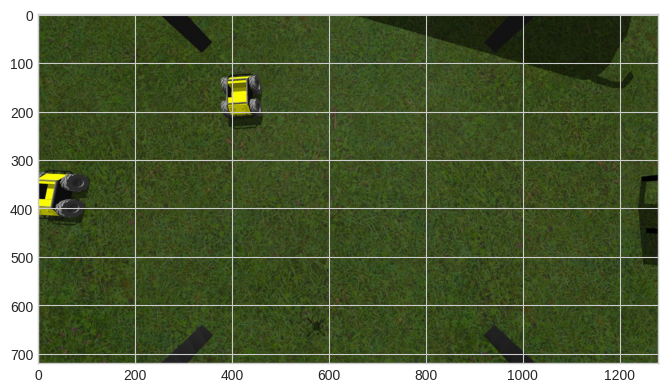

In [24]:
values_images = images_directory.values()
images_iterator = iter(values_images)
first_value = next(images_iterator)

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(first_value)

Camera calibration Matrix

In [25]:
K = np.array([[410., 0., 640.], [0., 410., 360.], [0., 0., 1.]])
K

array([[410.,   0., 640.],
       [  0., 410., 360.],
       [  0.,   0.,   1.]])